<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. PCA(Principal Component Analysis)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 넘파이 데이터셋을 판다스 DataFrame으로 변환

iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 원래 데이터 size
iris_df.shape

(150, 5)

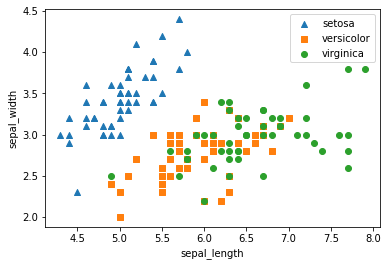

In [5]:
# plotting을 위해 setoasa는 세모, versicolor는 네모(square), virginica는 동그라미로 표현
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
  y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker,label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [6]:
# target값을 제외한 모든 feature값을 standard scaler로 변환
# PCA를 적용하기 전에는 동일한 scale를 갖는것이 필요(평균=0, 분산=1로 동일하게 전처리)

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [7]:
from sklearn.decomposition import PCA

# PCA 2개만 뽑겠다(4차원을 2차원으로 줄이겠다)
pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)
#차원 축소된거 알수 있음


(150, 2)


In [8]:
pca_columns = ['pca_component_1', 'pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


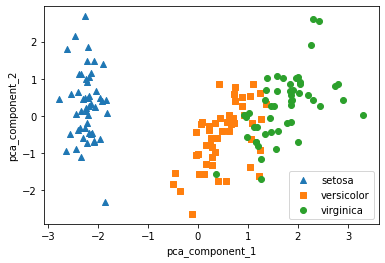

In [9]:
# 변환된 데이터를 plotting

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_1']
  y_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])


plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 변환한 후에 pca_component_1축을 기반으로 품종구분이 용이하게 됨

In [10]:
# 전체 변동성에서 개별 component별로 차지하는 변동성 비율

print(pca.explained_variance_ratio_)

# pca1이 데이터 전체 변동성의 약 72.9%, pca2가 약 22.8%를 차지

[0.72962445 0.22850762]


In [11]:
# 원래 데이터로 한 것과 차원 축소한 것과의 분류 성능을 비교해보자!

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# 원래 데이터(feature 4개)
rcf = RandomForestClassifier(random_state = 5)
scores = cross_val_score(rcf, iris.data,iris.target, scoring = 'accuracy', cv = 3)
print('원본데이터 교차검증 개별 정확도:', scores)
print('원본데이터 평균 정확도', np.mean(scores))

원본데이터 교차검증 개별 정확도: [0.98 0.94 0.98]
원본데이터 평균 정확도 0.9666666666666667


In [12]:
# 차원축소한 데이터(feature 2개)

pca_X = iris_df_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3)
print('PCA 변환 데이터 교차검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

# 성능은 떨어지긴 했으나, 차원이 50% 줄었음에도 어느정도는 유지

PCA 변환 데이터 교차검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


2. LDA(Linear Discriminant Analysis)
* PCA와 비교하기 위해 실습
* 비지도학습은 아니고 지도학습임
* 선형판별분석법으로 지도학습의 분류를 용이하게 하기 위해 차원을 축소하는 기법



In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [18]:
# 2개의 component로 붓꽃 데이터를 LDA 변환하기

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

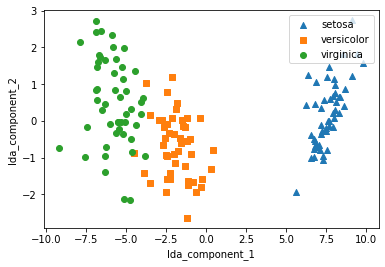

In [24]:
# plotting 해보기

import pandas as pd
import matplotlib.pyplot as plt


lda_columns = ['lda_component_1', 'lda_component_2']
iris_df_lda = pd.DataFrame(iris_lda, columns = lda_columns)
iris_df_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_1']
  y_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])


plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()